In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/bostevens/anaconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/bostevens/anaconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/bostevens/anaconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/bostevens/anaconda3/envs/py311/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

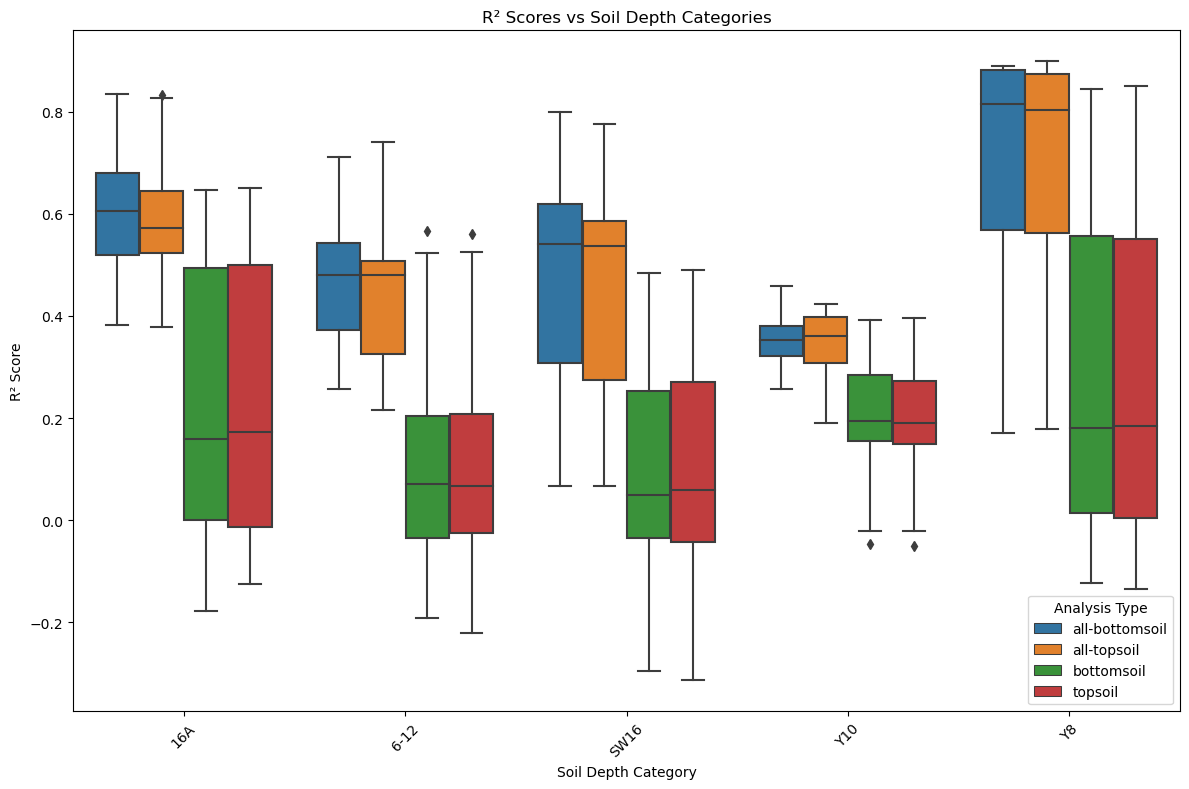

In [9]:
# Directory containing the result files
results_dir = '../../Temple/Data/SCINet_rf_output/rf_model_output_depth/results/'

# Initialize lists to store data
fields, years, soil_tests, depths, analysis_types, phosphorus_treatments, r2_scores = [], [], [], [], [], [], []

# Iterate over all files in the results directory
for filename in os.listdir(results_dir):
    if filename.endswith('.txt'):
        filepath = os.path.join(results_dir, filename)
        with open(filepath, 'r') as file:
            result = json.load(file)
            # Extract metadata from the filename
            filename = filename.replace('all_', 'all-')
            parts = filename.split('_')
            field = parts[0]
            year = int(parts[1])
            soil_test = parts[2]
            depth = parts[3] + '_' + parts[4]
            analysis_type = parts[5]
            phosphorus_treatment = parts[6].split('.')[0]
            r2 = result['r2']
            
            # Append to lists
            fields.append(field)
            years.append(year)
            soil_tests.append(soil_test)
            depths.append(depth)
            analysis_types.append(analysis_type)
            phosphorus_treatments.append(phosphorus_treatment)
            r2_scores.append(r2)

# Create a DataFrame from the collected data
df = pd.DataFrame({
    'Field': fields,
    'Year': years,
    'Soil Test': soil_tests,
    'Depth': depths,
    'Analysis Type': analysis_types,
    'Phosphorus Treatment': phosphorus_treatments,
    'R2 Score': r2_scores
})

# Plot the R2 scores versus soil depth categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='Field', y='R2 Score', hue = 'Analysis Type', data=df)
plt.title('R² Scores vs Soil Depth Categories')
plt.xlabel('Soil Depth Category')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()